In [2]:
#import libraries

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#get the first row to see column names
first_row_measure = session.query(Measure).first()
first_row_measure.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x176bfce79a0>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measure.date).order_by(Measure.date.desc()).first()
recent_date

('2017-08-23',)

In [12]:
#turn recent_date to string type
recent_date_str = recent_date[0]
recent_date_str

'2017-08-23'

In [13]:
#make recent_date_str to date format
recent_date_dt = dt.datetime.strptime(recent_date_str, "%Y-%m-%d").date()

#calculate the date a year from recent_date
year_ago = recent_date_dt - dt.timedelta(days=365)
year_ago


datetime.date(2016, 8, 23)

In [14]:
# Perform a query to retrieve the data and precipitation scores
last_year = session.query(Measure.prcp,Measure.date).order_by(Measure.date.desc()).filter(Measure.date<=recent_date_str).\
    filter(Measure.date>= year_ago).all()
last_year

[(0.0, '2017-08-23'),
 (0.0, '2017-08-23'),
 (0.08, '2017-08-23'),
 (0.45, '2017-08-23'),
 (0.0, '2017-08-22'),
 (0.0, '2017-08-22'),
 (0.5, '2017-08-22'),
 (0.0, '2017-08-21'),
 (0.02, '2017-08-21'),
 (None, '2017-08-21'),
 (0.56, '2017-08-21'),
 (0.0, '2017-08-20'),
 (0.01, '2017-08-20'),
 (None, '2017-08-20'),
 (0.0, '2017-08-19'),
 (0.0, '2017-08-19'),
 (None, '2017-08-19'),
 (0.09, '2017-08-19'),
 (0.0, '2017-08-18'),
 (0.0, '2017-08-18'),
 (0.06, '2017-08-18'),
 (None, '2017-08-18'),
 (0.0, '2017-08-17'),
 (0.05, '2017-08-17'),
 (0.01, '2017-08-17'),
 (0.13, '2017-08-17'),
 (0.0, '2017-08-16'),
 (0.07, '2017-08-16'),
 (0.12, '2017-08-16'),
 (0.42, '2017-08-16'),
 (0.02, '2017-08-15'),
 (0.0, '2017-08-15'),
 (0.06, '2017-08-15'),
 (0.32, '2017-08-15'),
 (0.42, '2017-08-15'),
 (0.0, '2017-08-14'),
 (0.01, '2017-08-14'),
 (0.08, '2017-08-14'),
 (0.0, '2017-08-14'),
 (0.22, '2017-08-14'),
 (0.0, '2017-08-13'),
 (None, '2017-08-13'),
 (0.0, '2017-08-13'),
 (0.0, '2017-08-13'),
 (None,

In [15]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_df = pd.DataFrame(last_year,columns=["prcp","date"])
last_year_df = last_year_df.fillna(0.00) #replace null values with 0s
last_year_df

,prcp,date
0,0.00,2017-08-23
1,0.00,2017-08-23
2,0.08,2017-08-23
3,0.45,2017-08-23
4,0.00,2017-08-22
...,...,...
2225,0.05,2016-08-23
2226,0.00,2016-08-23
2227,0.02,2016-08-23
2228,1.79,2016-08-23


In [16]:
# Sort the dataframe by date (ascending order)
last_year_df = last_year_df.sort_values("date", ascending=True)
last_year_df

,prcp,date
2229,0.70,2016-08-23
2223,0.00,2016-08-23
2224,0.15,2016-08-23
2228,1.79,2016-08-23
2226,0.00,2016-08-23
...,...,...
4,0.00,2017-08-22
3,0.45,2017-08-23
2,0.08,2017-08-23
1,0.00,2017-08-23


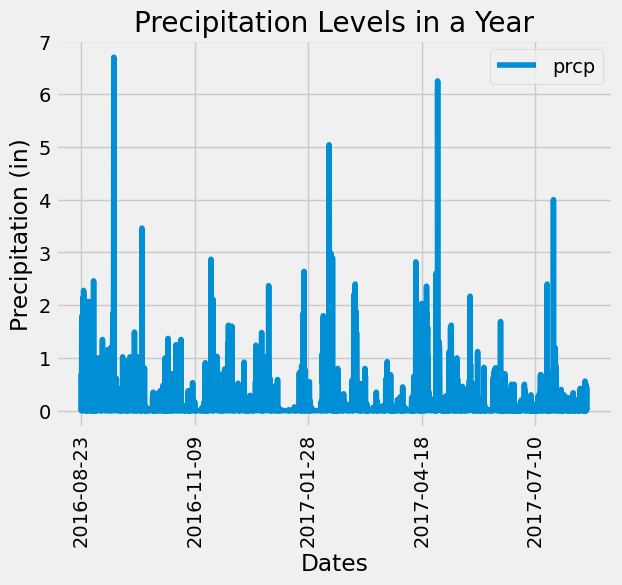

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data

last_year_df.plot(x="date",y="prcp")
plt.xlabel("Dates")
plt.ylabel("Precipitation (in)")
plt.xticks(rotation=90)
plt.title("Precipitation Levels in a Year")
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_stats = last_year_df.describe()
last_year_stats

,prcp
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station).count()
station_count

9

In [20]:
#view first row to see column names
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x176c4c51cc0>,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_names = session.query(Station.station, func.count(Measure.station)).\
    join(Measure, Measure.station==Station.station).\
    group_by(Measure.station).\
    order_by(func.count(Measure.station).desc()).all()
station_names

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
most_active_station = list(station_names[0]) #take first entry and turn to list
most_active_station


['USC00519281', 2772]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

low_high_avg_tmp = session.query(func.MIN(Measure.tobs),
                                func.MAX(Measure.tobs),
                                func.AVG(Measure.tobs)).\
                    filter(Measure.station==most_active_station[0]).all()
low_high_avg_tmp
print(f"Lowest: {low_high_avg_tmp[0][0]}")
print(f"Highest: {low_high_avg_tmp[0][1]}")
print(f"Average: {low_high_avg_tmp[0][2]}")

Lowest: 54.0
Highest: 85.0
Average: 71.66378066378067


In [24]:
#query most recent date for the most active station
recent_date_mostAct = session.query(func.MAX(Measure.date)).filter(Measure.station==most_active_station[0]).first()
recent_date_mostAct

('2017-08-18',)

In [25]:
#change to string value
recent_date_mostAct_str = recent_date_mostAct[0]
recent_date_mostAct_str

'2017-08-18'

In [26]:
#change to date value
recent_date_mostAct_dt = dt.datetime.strptime(recent_date_mostAct_str, "%Y-%m-%d").date()

#calculate the date a year from recent_date_mostAct
year_ago_mostAct = recent_date_mostAct_dt - dt.timedelta(days=365)
year_ago_mostAct

datetime.date(2016, 8, 18)

In [27]:
#get all temp points
last12_act = session.query(Measure.tobs).\
                order_by(Measure.date.desc()).\
                filter(Measure.date <= recent_date_mostAct_str).\
                filter(Measure.date >= year_ago_mostAct).all()
last12_act

[(80.0,),
 (77.0,),
 (79.0,),
 (76.0,),
 (78.0,),
 (83.0,),
 (76.0,),
 (72.0,),
 (82.0,),
 (79.0,),
 (76.0,),
 (71.0,),
 (78.0,),
 (82.0,),
 (79.0,),
 (77.0,),
 (70.0,),
 (79.0,),
 (81.0,),
 (75.0,),
 (77.0,),
 (79.0,),
 (81.0,),
 (81.0,),
 (84.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (83.0,),
 (74.0,),
 (78.0,),
 (81.0,),
 (81.0,),
 (72.0,),
 (81.0,),
 (81.0,),
 (80.0,),
 (75.0,),
 (80.0,),
 (81.0,),
 (71.0,),
 (80.0,),
 (78.0,),
 (82.0,),
 (74.0,),
 (80.0,),
 (81.0,),
 (83.0,),
 (78.0,),
 (80.0,),
 (82.0,),
 (83.0,),
 (83.0,),
 (79.0,),
 (81.0,),
 (82.0,),
 (77.0,),
 (80.0,),
 (81.0,),
 (82.0,),
 (77.0,),
 (79.0,),
 (81.0,),
 (80.0,),
 (76.0,),
 (73.0,),
 (80.0,),
 (83.0,),
 (80.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (72.0,),
 (80.0,),
 (77.0,),
 (81.0,),
 (81.0,),
 (82.0,),
 (76.0,),
 (74.0,),
 (81.0,),
 (78.0,),
 (84.0,),
 (81.0,),
 (79.0,),
 (81.0,),
 (78.0,),
 (82.0,),
 (83.0,),
 (82.0,),
 (77.0,),
 (81.0,),
 (77.0,),
 (81.0,),
 (80.0,),
 (81.0,),
 (81.0,),
 (73.0,),
 (79.0,),
 (77.0,),


In [28]:
#convert rows to a list
data_points = [row[0] for row in last12_act]

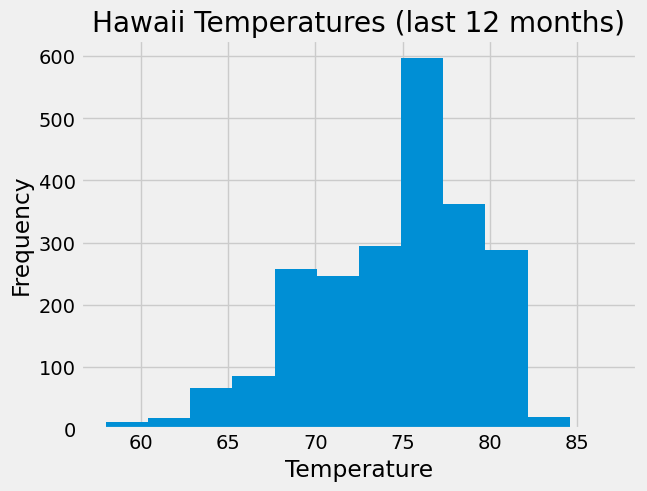

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = data_points
plt.hist(data, bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Hawaii Temperatures (last 12 months)")
plt.show()

# Close Session

In [30]:
# Close Session
session.close()